In [9]:
import numpy as np
import matplotlib.pyplot as plt
from catClassifier import CatClassifier

### Q1

In [10]:
X = np.loadtxt('cat_data_X.csv', ndmin=2)
y = np.loadtxt('cat_data_y.csv')

### Q2

y_train: (300,)
-1 count : 101, 1 count : 199


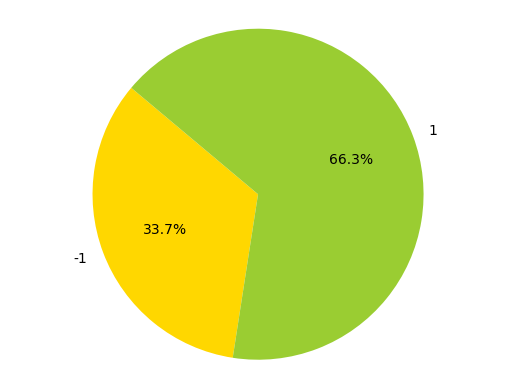

min : 1.7, max : 8.53, median : 5.51
min 1 : 3.21, max 1 : 8.53, median 1 : 6.1
min -1 : 1.7, max -1 : 6.19, median -1 : 4.08


In [11]:
# statistiques sur y
print('y_train:', y.shape)

# nombres de -1 et de 1
n_moins1 = np.sum(y == -1)
n_plus1 = np.sum(y == 1)
print(f"-1 count : {n_moins1}, 1 count : {n_plus1}")

# pie chart
labels = '-1', '1'
sizes = [n_moins1, n_plus1]
colors = ['gold', 'yellowgreen']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

print(f"min : {np.min(X)}, max : {np.max(X)}, median : {np.median(X)}")

X_1 = X[y == 1]
X_m1 = X[y == -1]

print(f"min 1 : {np.min(X_1)}, max 1 : {np.max(X_1)}, median 1 : {np.median(X_1)}")
print(f"min -1 : {np.min(X_m1)}, max -1 : {np.max(X_m1)}, median -1 : {np.median(X_m1)}")

### Q4

In [12]:
clf = CatClassifier()
print(clf.predict(X, 5))

[-1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1  1
 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1
  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1  1  1  1 -1  1
  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1
 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1
  1  1  1 -1  1  1  1 -1 -1  1 -1  1 -1  1 -1  1  1  1  1  1 -1  1 -1 -1
 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1  1  1
  1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1
  1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1  1  1  1
  1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1
  1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1
  1 -1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1
 -1  1  1  1  1 -1  1  1 -1 -1  1 -1]


### Q6

In [13]:
print(clf.err_emp(X, y, 5))

0.15333333333333332


### Q8 & Q9

In [14]:
clf = CatClassifier()

clf.fit(X, y)
print(clf.h_hat)
print(clf.err_emp(X, y))

[4.32]
0.13666666666666666


### Q11

In [15]:
def cross_val(x, y, n_class):
    x=x.flatten()
    classes = np.split(np.array([x, y]), n_class, axis=1)
    losses = []
    h_hats = []

    for i, val_set in enumerate(classes):
        train_set = [class_j for j, class_j in enumerate(classes) if i!=j]

        train_set = np.concatenate(train_set)

        classifier = CatClassifier()
        classifier.fit(train_set[0,:], train_set[1,:])
        losses.append(classifier.err_emp(val_set[0,:], val_set[1,:]))
        h_hats.append(classifier.h_hat)

    h_hat = np.mean(h_hats)

    return h_hat, losses
        
cross_val(X, y, 5)

(4.78,
 [0.4666666666666667,
  0.16666666666666666,
  0.06666666666666667,
  0.16666666666666666,
  0.15])

### Q12 & Q13

In [16]:
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit

# Create a k-fold cross validation iterator
kf = KFold(n_splits=5)
ss = ShuffleSplit(n_splits=5)
skf = StratifiedKFold(n_splits=5)
sss = StratifiedShuffleSplit(n_splits=5)

# Perform k-fold cross validation
losses = []
h_hats = []

for split in [kf, ss, skf, sss]:
    for train_index, val_index in split.split(X, y):
        clf = CatClassifier()
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        clf.fit(X_train, y_train)
        losses.append(clf.err_emp(X_val, y_val))
        h_hats.append(clf.h_hat)

    print(np.mean(h_hats))

4.78
5.245
4.840666666666667
4.975499999999999
